In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/stanis-molnar/Credit_Card_Customers/master/BankChurners.csv'
df = pd.read_csv(url) 
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
#Dimension of the dataset
df.shape

(10127, 23)

In [4]:
#Dropping unnecessary columns
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace = True)
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace = True)
df.drop('CLIENTNUM', axis=1, inplace = True)

In [5]:
#Dimension of the dataset
df.shape

(10127, 20)

In [6]:
# Checking for NaN values
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
#from sklearn.preprocessing import LabelEncoder
## Apply label encoder to each column with categorical data
#label_encoder = LabelEncoder()
#for col in object_cols:
#    df[col] = label_encoder.fit_transform(df[col])

I could use the LabelEnconder function and prepare the categorical variables automatically in a pipeline. However I want to have more control, for instance the higher the income category the higher the variable should be. Therefore I create a dictionary to control the categorical variables in a better way.

In [9]:
#I can create a dataframe only with categorical variables
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [10]:
from collections import Counter

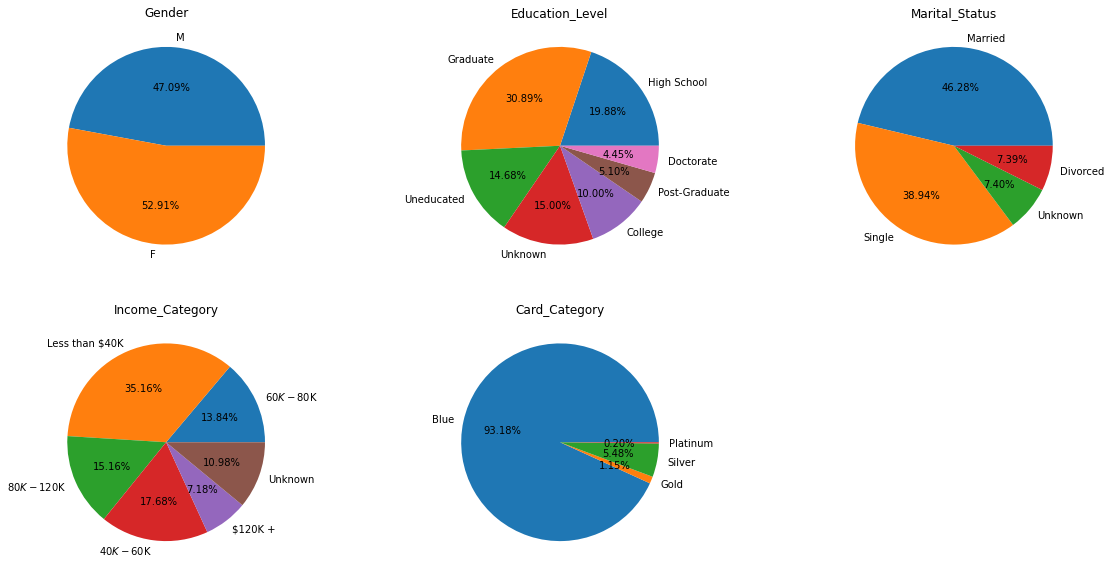

In [11]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(obj_df.columns[list(range(1, obj_df.shape[1]))], 1):
    plt.subplot(2, 3, i)
    count = Counter(df[column])
    plt.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
    plt.title(column)

In [12]:
catvars_nums = {"Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1},
                "Gender": {"M": 0, "F": 1},
                "Education_Level": {"Unknown": 0, "Uneducated": 1, "High School": 2, "College": 3,
                                  "Graduate": 4, "Post-Graduate": 5, "Doctorate": 6},
                "Marital_Status": {"Unknown": 0, "Single": 1, "Married": 2, "Divorced": 3},
                "Income_Category": {"Unknown": 0, "Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3,
                                  "$80K - $120K": 2, "$120K +": 3},
                "Card_Category": {"Blue": 1, "Silver": 2, "Gold": 3, "Platinum": 4}
               }

In [13]:
obj_df = obj_df.replace(catvars_nums)
obj_df.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,0,2,2,3,1
1,0,1,4,1,1,1
2,0,0,4,2,2,1
3,0,1,2,0,1,1
4,0,0,1,2,3,1


In [14]:
df.replace(catvars_nums,inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,4,2,2,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
df.shape[1]/3

6.666666666666667

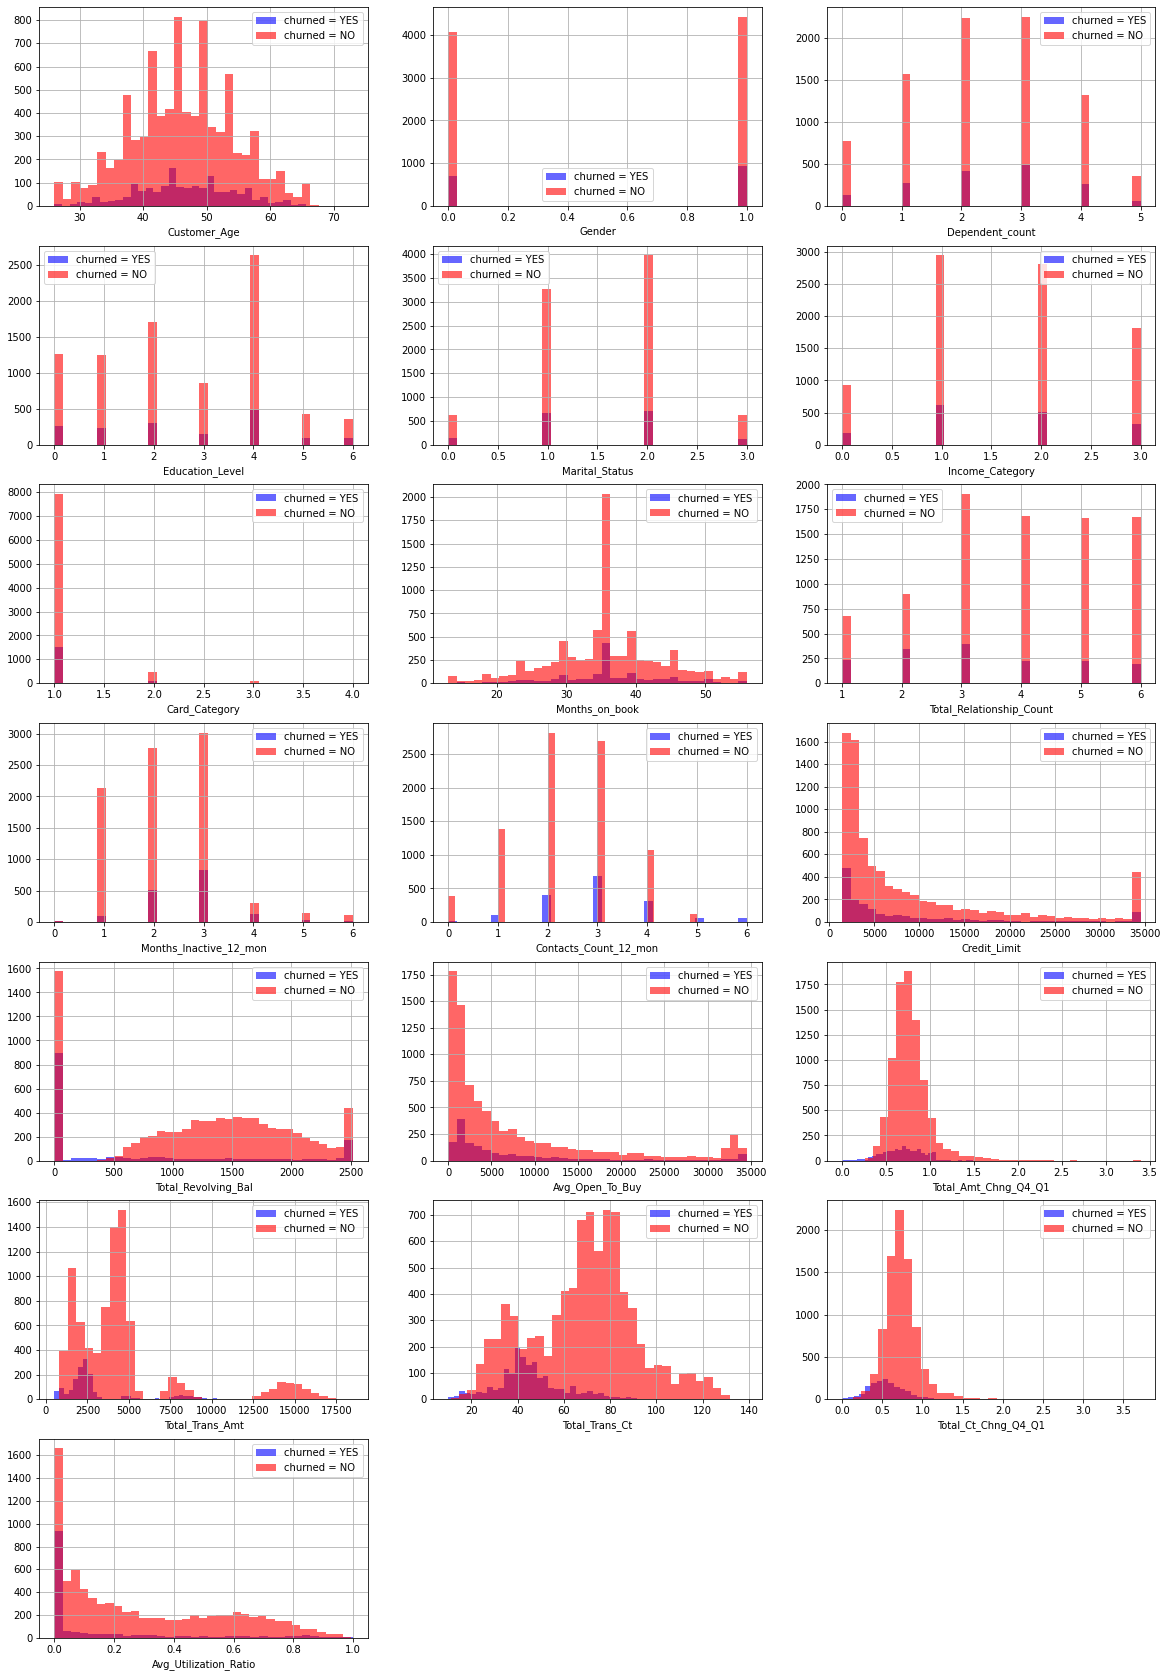

In [16]:
plt.figure(figsize=(20, 30))

for i, column in enumerate(df.columns[list(range(1, df.shape[1]))], 1):
    plt.subplot(7, 3, i)
    df[df["Attrition_Flag"] == 1][column].hist(bins=35, color='blue', label ='churned = YES', alpha=0.6)
    df[df["Attrition_Flag"] == 0][column].hist(bins=35, color='red', label ='churned = NO', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [17]:
#plt.figure(figsize=(30, 30))
#sns.pairplot(df, hue='Attrition_Flag', height=3, diag_kind='hist')

-----

# Model Preparation

In [18]:
#Variables that we use to make the prediction in our model
Feature = df.drop(['Attrition_Flag'], axis=1)
Feature.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,0,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,1,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,0,3,4,2,2,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,1,4,2,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,0,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [19]:
# Standardizing the parametres
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(Feature).transform(Feature)

In [20]:
# Target variable
y = df['Attrition_Flag'].values

In [21]:
#inputs for the models
rand_state=13
n_est=1000
t_size=0.10

In [22]:
# Splitting the data two samples, training (90 %) and test (10 %) datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=t_size, random_state=rand_state)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9114, 19) (9114,)
Test set: (1013, 19) (1013,)


# Bagging Algoritms

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
#from sklearn.metrics import recall_score


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


-----

## Decision Tree

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=n_est, random_state=rand_state)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7651    0]
 [   0 1463]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    7651.0  1463.0       1.0     9114.0        9114.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[836  13]
 [ 27 137]]
ACCURACY SCORE:
0.9605
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.968714    0.913333  0.960513     0.941024      0.959748
recall       0.984688    0.835366  0.960513     0.910027      0.960513
f1-score     0.976636    0.872611  0.960513     0.924623      0.959795
support    849.000000  164.000000  0.960513  1013.000000   1013.000000


In [26]:
scores = {
    'Bagging Classifier': {
        'Train': recall_score(y_train, bagging_clf.predict(X_train)),
        'Test': recall_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [27]:
recall_score(y_test, bagging_clf.predict(X_test))

0.8353658536585366

In [28]:
scores

{'Bagging Classifier': {'Test': 0.8353658536585366, 'Train': 1.0}}

-----

## Random Forrest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=rand_state, n_estimators=n_est)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7651    0]
 [   0 1463]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    7651.0  1463.0       1.0     9114.0        9114.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[837  12]
 [ 25 139]]
ACCURACY SCORE:
0.9635
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.970998    0.920530  0.963475     0.945764      0.962827
recall       0.985866    0.847561  0.963475     0.916713      0.963475
f1-score     0.978375    0.882540  0.963475     0.930457      0.962860
support    849.000000  164.000000  0.963475  1013.000000   1013.000000


In [30]:
scores['Random Forest'] = {
        'Train': recall_score(y_train, rf_clf.predict(X_train)),
        'Test': recall_score(y_test, rf_clf.predict(X_test)),
    }

In [31]:
scores

{'Bagging Classifier': {'Test': 0.8353658536585366, 'Train': 1.0},
 'Random Forest': {'Test': 0.8475609756097561, 'Train': 1.0}}

-----

## Extra Trees

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=n_est, max_features=7, random_state=rand_state)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7651    0]
 [   0 1463]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    7651.0  1463.0       1.0     9114.0        9114.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[836  13]
 [ 36 128]]
ACCURACY SCORE:
0.9516
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.958716    0.907801  0.951629     0.933259      0.950473
recall       0.984688    0.780488  0.951629     0.882588      0.951629
f1-score     0.971528    0.839344  0.951629     0.905436      0.950128
support    849.000000  164.000000  0.951629  1013.000000   1013.000000


In [33]:
scores['Extra Tree'] = {
        'Train': recall_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': recall_score(y_test, ex_tree_clf.predict(X_test)),
    }

In [34]:
scores

{'Bagging Classifier': {'Test': 0.8353658536585366, 'Train': 1.0},
 'Extra Tree': {'Test': 0.7804878048780488, 'Train': 1.0},
 'Random Forest': {'Test': 0.8475609756097561, 'Train': 1.0}}

-------

# Boosting Algoritms

## AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=n_est)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7574   77]
 [ 113 1350]]
ACCURACY SCORE:
0.9792
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.985300     0.946041  0.979153     0.965670      0.978998
recall        0.989936     0.922761  0.979153     0.956349      0.979153
f1-score      0.987612     0.934256  0.979153     0.960934      0.979048
support    7651.000000  1463.000000  0.979153  9114.000000   9114.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[819  30]
 [ 20 144]]
ACCURACY SCORE:
0.9506
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.976162    0.827586  0.950642     0.901874      0.952108
recall       0.964664    0.878049  0.950642     0.921357      0.950642
f1-score     0.970379    0.852071  0.950642     0.911225      0.951226
support    849.000000  164.000000  0.950642  1013.000000   1013.000000


In [36]:
scores['AdaBoost'] = {
        'Train': recall_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': recall_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [37]:
scores

{'AdaBoost': {'Test': 0.8780487804878049, 'Train': 0.9227614490772386},
 'Bagging Classifier': {'Test': 0.8353658536585366, 'Train': 1.0},
 'Extra Tree': {'Test': 0.7804878048780488, 'Train': 1.0},
 'Random Forest': {'Test': 0.8475609756097561, 'Train': 1.0}}

-----

## Stochastic Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=n_est, random_state=rand_state)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7651    0]
 [   0 1463]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    7651.0  1463.0       1.0     9114.0        9114.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[838  11]
 [ 18 146]]
ACCURACY SCORE:
0.9714
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.978972    0.929936  0.971372     0.954454      0.971033
recall       0.987044    0.890244  0.971372     0.938644      0.971372
f1-score     0.982991    0.909657  0.971372     0.946324      0.971119
support    849.000000  164.000000  0.971372  1013.000000   1013.000000


In [39]:
scores['Gradient Boosting'] = {
        'Train': recall_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': recall_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [40]:
scores

{'AdaBoost': {'Test': 0.8780487804878049, 'Train': 0.9227614490772386},
 'Bagging Classifier': {'Test': 0.8353658536585366, 'Train': 1.0},
 'Extra Tree': {'Test': 0.7804878048780488, 'Train': 1.0},
 'Gradient Boosting': {'Test': 0.8902439024390244, 'Train': 1.0},
 'Random Forest': {'Test': 0.8475609756097561, 'Train': 1.0}}

-----

# Voting Ensemble

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7563   88]
 [ 339 1124]]
ACCURACY SCORE:
0.9531
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.957099     0.927393  0.953149     0.942246      0.952331
recall        0.988498     0.768284  0.953149     0.878391      0.953149
f1-score      0.972545     0.840374  0.953149     0.906460      0.951329
support    7651.000000  1463.000000  0.953149  9114.000000   9114.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[830  19]
 [ 47 117]]
ACCURACY SCORE:
0.9348
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.946408    0.860294  0.934847     0.903351      0.932467
recall       0.977621    0.713415  0.934847     0.845518      0.934847
f1-score     0.961761    0.780000  0.934847     0.870881      0.932335
support    849.000000  164.000000  0.934847  1013.000000   1013.000000


In [42]:
estimators

[('Logistic',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('Tree',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('SVM',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=

In [43]:
scores['Voting'] = {
        'Train': recall_score(y_train, voting.predict(X_train)),
        'Test': recall_score(y_test, voting.predict(X_test)),
    }

----

# Results

In [44]:
scores_df = pd.DataFrame(scores)

In [45]:
scores_df 

,Bagging Classifier,Random Forest,Extra Tree,AdaBoost,Gradient Boosting,Voting
Train,1.000000,1.000000,1.000000,0.922761,1.000000,0.768284
Test,0.835366,0.847561,0.780488,0.878049,0.890244,0.713415


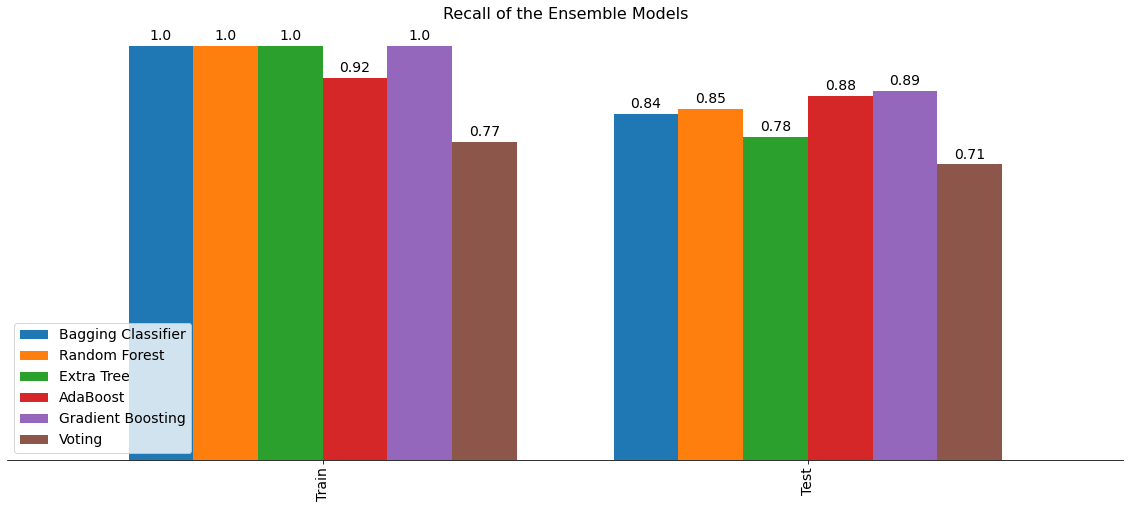

In [46]:
#,color=['#5cb85c','#5bc0de','#d9534f']
ax=scores_df.plot(kind='bar', figsize=(20, 8), width=0.8,fontsize=14) 
plt.legend(fontsize=14,loc="lower left")
plt.title("Recall of the Ensemble Models",fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                                (p.get_x()+p.get_width()/2., p.get_height()),
                                ha='center',va='center',xytext=(0, 10),textcoords='offset points',fontsize=14) 
plt.show()

## Authors:

### Daniel Molnar & Vanessa Koch